<a href="https://colab.research.google.com/github/pulavartivinay/Face_Mask_Detection/blob/FHHQ_dataset/Main_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
!gdown --id 1J1PMNarMv1v5USz9MO-G-maoVROzhj1V
!unzip /content/00000_masked.zip 
!mv /content/00000 /content/mask

In [ ]:
!gdown --id 14jEw9R1UrSyBwjL8oR3ZiQqzZ3dgAmsi
!unzip /content/00000_unmasked.zip 
!mv /content/00000 /content/unmask



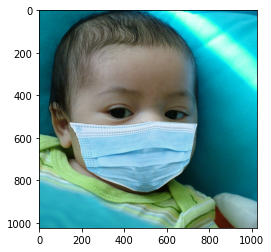

In [14]:
img_array = cv2.imread("/content/mask/00000_Mask.jpg")
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array)

In [19]:
dataSet = []
classes = ['mask', 'unmask']
for category in classes:
  path = os.path.join("/content/", category)
  label = classes.index(category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img_array, (224, 224))
    dataSet.append([resized_img, label])



In [20]:
random.shuffle(dataSet)

In [21]:
X = []
y = []

for img, label in dataSet:
  X.append(img)
  y.append(label)

X = np.array(X).reshape(-1, 224, 224, 3)
y = np.array(y)

X = X/255.0  #Normalise the data 

**Model**

In [33]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [34]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

mask_model = keras.Model(inputs = base_input, outputs = final_output)

In [35]:
mask_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [36]:
mask_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
mask_model.fit(X, y, validation_split=0.1, epochs=2)

Epoch 1/2
55/55 [==============================] - 347s 6s/step - loss: 0.0773 - accuracy: 0.9556 - val_loss: 3.1161e-06 - val_accuracy: 1.0000
Epoch 2/2
55/55 [==============================] - 349s 6s/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 1.0567e-06 - val_accuracy: 1.0000


In [38]:
mask_model.save("/content/model_FHHQ_2epochs_sigmoid.h5")